In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [79]:
df=pd.read_csv('/content/heart.csv')

In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [81]:
df.shape

(918, 12)

In [82]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [83]:
df.isnull().sum()

,0
Age,0
Sex,0
ChestPainType,0
RestingBP,0
Cholesterol,0
FastingBS,0
RestingECG,0
MaxHR,0
ExerciseAngina,0
Oldpeak,0


In [84]:
df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [85]:
df.duplicated().sum()

np.int64(0)

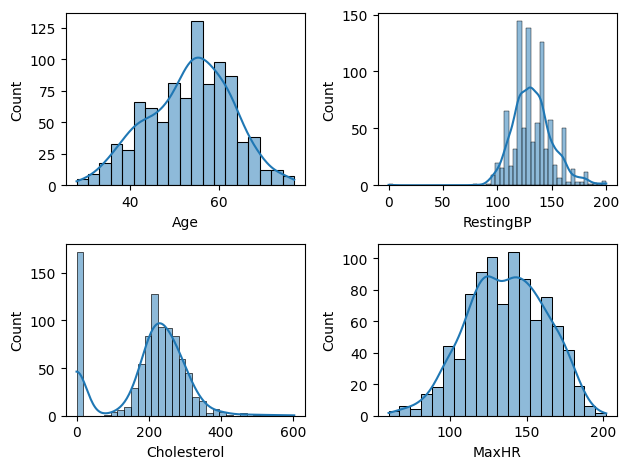

In [86]:
def plotting(var,num):
    plt.subplot(2,2,num)
    sns.histplot(df[var],kde = True)

plotting('Age',1)
plotting('RestingBP',2)
plotting('Cholesterol',3)
plotting('MaxHR',4)


plt.tight_layout()

In [87]:
ch_mean = df.loc[df['Cholesterol'] != 0,'Cholesterol'].mean()

In [88]:
df['Cholesterol'] = df['Cholesterol'].replace(0,ch_mean)
df['Cholesterol'] = df['Cholesterol'].round(2)

In [89]:
resting_bp_mean = df.loc[df['RestingBP'] != 0, 'RestingBP'].mean()

df['RestingBP'] = df['RestingBP'].replace(0, resting_bp_mean)

df['RestingBP'] = df['RestingBP'].round(2)

In [90]:
df_encoded = pd.get_dummies(df,drop_first=True)

In [91]:
df_encoded

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,40,140.0,289.0,0,172,0.0,0,True,True,False,False,True,False,False,False,True
1,49,160.0,180.0,0,156,1.0,1,False,False,True,False,True,False,False,True,False
2,37,130.0,283.0,0,98,0.0,0,True,True,False,False,False,True,False,False,True
3,48,138.0,214.0,0,108,1.5,1,False,False,False,False,True,False,True,True,False
4,54,150.0,195.0,0,122,0.0,0,True,False,True,False,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,110.0,264.0,0,132,1.2,1,True,False,False,True,True,False,False,True,False
914,68,144.0,193.0,1,141,3.4,1,True,False,False,False,True,False,False,True,False
915,57,130.0,131.0,0,115,1.2,1,True,False,False,False,True,False,True,True,False
916,57,130.0,236.0,0,174,0.0,1,False,True,False,False,False,False,False,True,False


In [92]:
df_encoded = df_encoded.astype(int)

In [93]:
df_encoded

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0,0,1,1,0,0,1,0,0,0,1
1,49,160,180,0,156,1,1,0,0,1,0,1,0,0,1,0
2,37,130,283,0,98,0,0,1,1,0,0,0,1,0,0,1
3,48,138,214,0,108,1,1,0,0,0,0,1,0,1,1,0
4,54,150,195,0,122,0,0,1,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,110,264,0,132,1,1,1,0,0,1,1,0,0,1,0
914,68,144,193,1,141,3,1,1,0,0,0,1,0,0,1,0
915,57,130,131,0,115,1,1,1,0,0,0,1,0,1,1,0
916,57,130,236,0,174,0,1,0,1,0,0,0,0,0,1,0


In [94]:
from sklearn.preprocessing import StandardScaler
numerical_cols = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']
scaler = StandardScaler()
df_encoded[numerical_cols] = scaler.fit_transform(df_encoded[numerical_cols])
df_encoded.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,-1.433140,0.414885,0.834754,0,1.382928,-0.727592,0,1,1,0,0,1,0,0,0,1
1,-0.478484,1.527224,-1.210675,0,0.754157,0.282891,1,0,0,1,0,1,0,0,1,0
2,-1.751359,-0.141284,0.722161,0,-1.525138,-0.727592,0,1,1,0,0,0,1,0,0,1
3,-0.584556,0.303651,-0.572651,0,-1.132156,0.282891,1,0,0,0,0,1,0,1,1,0
4,0.051881,0.971054,-0.929194,0,-0.581981,-0.727592,0,1,0,1,0,1,0,0,0,1


In [95]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix,f1_score
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [96]:
X = df_encoded.drop('HeartDisease', axis=1)
y = df_encoded['HeartDisease']

In [97]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [98]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [99]:
models = {
    "Logistic Regression": LogisticRegression(),
    "KNN": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB(),
    "Decision Tree": DecisionTreeClassifier(),
    "SVM (RBF Kernel)": SVC(probability=True)
}

In [100]:
results = []

In [101]:
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    results.append({
        'Model': name,
        'Accuracy': round(acc, 4),
        'F1 Score': round(f1, 4)
    })

In [102]:
results

[{'Model': 'Logistic Regression', 'Accuracy': 0.8696, 'F1 Score': 0.8846},
 {'Model': 'KNN', 'Accuracy': 0.8641, 'F1 Score': 0.8815},
 {'Model': 'Naive Bayes', 'Accuracy': 0.8478, 'F1 Score': 0.8614},
 {'Model': 'Decision Tree', 'Accuracy': 0.7772, 'F1 Score': 0.794},
 {'Model': 'SVM (RBF Kernel)', 'Accuracy': 0.8478, 'F1 Score': 0.8667}]

In [103]:
from sklearn.ensemble import RandomForestClassifier

In [104]:
rf_model=RandomForestClassifier( n_estimators = 100,max_depth=None, random_state=42)


In [105]:
rf_model.fit(X_train_scaled,y_train)

RandomForestClassifier(random_state=42)

In [106]:
y_pred=rf_model.predict(X_test_scaled)

In [107]:
accuracy_score(y_test,y_pred)

0.8586956521739131

In [108]:
from xgboost import XGBClassifier

In [109]:
xgb_model=XGBClassifier(n_estimator=100,learning_rate=0.1,max_depth=3,use_label_encoder=False,eval_metric='logloss',random_state=42)

In [110]:
xgb_model.fit(X_train_scaled,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimator=100, n_estimators=None,
              n_jobs=None, ...)

In [111]:
y_pred=xgb_model.predict(X_test_scaled)

In [112]:
accuracy=accuracy_score(y_test,y_pred)

In [113]:
accuracy

0.8695652173913043

In [114]:
from sklearn.model_selection import GridSearchCV

In [115]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'gamma': [0, 1, 5],
    'reg_lambda': [1, 1.5, 2]
}

In [116]:
grid_search = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid,
    scoring='accuracy',
    cv=5,                # 5-fold cross-validation
    verbose=1,
    n_jobs=-1
)

In [117]:
grid_search.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 972 candidates, totalling 4860 fits


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='logloss', feature_types=None,
                                     feature_weights=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraint...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimator=100,
                                     n_estimators=None, n_jobs=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.8, 1.0], 'gamma': [0, 1, 5],
                         'learning_rate': [0.01, 0.05, 0.1],
                         'max_depth': [3, 5, 7], 'n_estimators': [50, 100, 200],
                         'reg_lambda': [1, 1.5, 2], 'subsample': [0.8, 1.0]},
             scoring='accuracy', verbose=1)

In [118]:
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'colsample_bytree': 1.0, 'gamma': 1, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50, 'reg_lambda': 2, 'subsample': 0.8}


In [119]:
best_model = grid_search.best_estimator_

In [120]:
f_pred = best_model.predict(X_test_scaled)

In [121]:
acc=accuracy_score(y_test,f_pred)

In [122]:
acc

0.8478260869565217

In [123]:
from sklearn.ensemble import StackingClassifier


In [124]:
base_learners = [
    ('xgb', XGBClassifier(n_estimator=100,learning_rate=0.1,max_depth=3,use_label_encoder=False,eval_metric='logloss',random_state=42)),
    ('rf', RandomForestClassifier( n_estimators = 100,max_depth=None, random_state=42)),
    ('lr', LogisticRegression(max_iter=1000))
]

In [125]:
meta_learner = LogisticRegression(max_iter=1000)

In [126]:
stacking_model = StackingClassifier(
    estimators=base_learners,
    final_estimator=meta_learner,
    cv=5
)


In [127]:
stacking_model.fit(X_train_scaled, y_train)

StackingClassifier(cv=5,
                   estimators=[('xgb',
                                XGBClassifier(base_score=None, booster=None,
                                              callbacks=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=None,
                                              device=None,
                                              early_stopping_rounds=None,
                                              enable_categorical=False,
                                              eval_metric='logloss',
                                              feature_types=None,
                                              feature_weights=None, gamma=None,
                                              grow_policy=None,
                                              importance_type=None,
                                              interac...
                                              max_cat_threshold=None,
                                              max_cat_to_onehot=None,
                                              max_delta_step=None, max_depth=3,
                                              max_leaves=None,
                                              min_child_weight=None,
                                              missing=nan,
                                              monotone_constraints=None,
                                              multi_strategy=None,
                                              n_estimator=100,
                                              n_estimators=None, n_jobs=None, ...)),
                               ('rf', RandomForestClassifier(random_state=42)),
                               ('lr', LogisticRegression(max_iter=1000))],
                   final_estimator=LogisticRegression(max_iter=1000))

In [128]:
s_pred = stacking_model.predict(X_test_scaled)


accu = accuracy_score(y_test, s_pred)

In [129]:
accu

0.8641304347826086

In [130]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier

In [131]:
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_params = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 4, 5],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.7, 0.8, 1.0],
    'colsample_bytree': [0.7, 0.8, 1.0],
    'gamma': [0, 1, 5]
}

xgb_search = RandomizedSearchCV(xgb, xgb_params, n_iter=10, cv=5, scoring='accuracy', n_jobs=-1, random_state=42)
xgb_search.fit(X_train_scaled, y_train)
best_xgb = xgb_search.best_estimator_
print("Best XGB:", xgb_search.best_params_)


Best XGB: {'subsample': 0.8, 'n_estimators': 100, 'max_depth': 4, 'learning_rate': 0.1, 'gamma': 1, 'colsample_bytree': 0.7}


In [132]:
rf = RandomForestClassifier(random_state=42)
rf_params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

rf_search = RandomizedSearchCV(rf, rf_params, n_iter=10, cv=5, scoring='accuracy', n_jobs=-1, random_state=42)
rf_search.fit(X_train_scaled, y_train)
best_rf = rf_search.best_estimator_
print("Best RF:", rf_search.best_params_)

Best RF: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 20, 'bootstrap': True}


In [133]:
lr = LogisticRegression(max_iter=500, solver='liblinear')
lr_params = {
    'C': np.logspace(-3, 3, 7),
    'penalty': ['l1', 'l2']
}

lr_search = RandomizedSearchCV(lr, lr_params, n_iter=5, cv=5, scoring='accuracy', n_jobs=-1, random_state=42)
lr_search.fit(X_train_scaled, y_train)
best_lr = lr_search.best_estimator_
print("Best LR:", lr_search.best_params_)

Best LR: {'penalty': 'l2', 'C': np.float64(0.1)}


In [134]:
stack = StackingClassifier(
    estimators=[('xgb', best_xgb), ('rf', best_rf)],
    final_estimator=best_lr,
    n_jobs=-1
)


In [135]:
stack.fit(X_train_scaled, y_train)

StackingClassifier(estimators=[('xgb',
                                XGBClassifier(base_score=None, booster=None,
                                              callbacks=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=0.7, device=None,
                                              early_stopping_rounds=None,
                                              enable_categorical=False,
                                              eval_metric='logloss',
                                              feature_types=None,
                                              feature_weights=None, gamma=1,
                                              grow_policy=None,
                                              importance_type=None,
                                              interaction_cons...
                                              max_delta_step=None, max_depth=4,
                                              max_leaves=None,
                                              min_child_weight=None,
                                              missing=nan,
                                              monotone_constraints=None,
                                              multi_strategy=None,
                                              n_estimators=100, n_jobs=None,
                                              num_parallel_tree=None, ...)),
                               ('rf',
                                RandomForestClassifier(max_depth=20,
                                                       n_estimators=200,
                                                       random_state=42))],
                   final_estimator=LogisticRegression(C=np.float64(0.1),
                                                      max_iter=500,
                                                      solver='liblinear'),
                   n_jobs=-1)

In [136]:
y_pred = stack.predict(X_test_scaled)
print("Stacking Accuracy:", accuracy_score(y_test, y_pred))

Stacking Accuracy: 0.8804347826086957


In [137]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [138]:
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('logreg', LogisticRegression(max_iter=500))
])

In [139]:
param_grid = {
    'logreg__C': [0.01, 0.1, 1, 10, 100],         # Regularization strength
    'logreg__penalty': ['l1', 'l2', 'elasticnet'], # Penalty type
    'logreg__solver': ['saga'],                   # saga supports l1, l2, elasticnet
    'logreg__l1_ratio': [0, 0.5, 1]               # Only for elasticnet
}

In [140]:
grid = GridSearchCV(pipe, param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)
grid.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 45 candidates, totalling 225 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('logreg',
                                        LogisticRegression(max_iter=500))]),
             n_jobs=-1,
             param_grid={'logreg__C': [0.01, 0.1, 1, 10, 100],
                         'logreg__l1_ratio': [0, 0.5, 1],
                         'logreg__penalty': ['l1', 'l2', 'elasticnet'],
                         'logreg__solver': ['saga']},
             scoring='accuracy', verbose=2)

In [141]:
print("Best Parameters:", grid.best_params_)

Best Parameters: {'logreg__C': 0.1, 'logreg__l1_ratio': 0.5, 'logreg__penalty': 'elasticnet', 'logreg__solver': 'saga'}


In [142]:
stack = StackingClassifier(
    estimators=[('xgb', best_xgb), ('rf', best_rf), ('lr_tuned', grid.best_estimator_)],
    final_estimator=best_lr,
    n_jobs=-1
)
be_lr = lr_search.best_estimator_

In [143]:
stack.fit(X_train_scaled, y_train)

StackingClassifier(estimators=[('xgb',
                                XGBClassifier(base_score=None, booster=None,
                                              callbacks=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=0.7, device=None,
                                              early_stopping_rounds=None,
                                              enable_categorical=False,
                                              eval_metric='logloss',
                                              feature_types=None,
                                              feature_weights=None, gamma=1,
                                              grow_policy=None,
                                              importance_type=None,
                                              interaction_cons...
                                              num_parallel_tree=None, ...)),
                               ('rf',
                                RandomForestClassifier(max_depth=20,
                                                       n_estimators=200,
                                                       random_state=42)),
                               ('lr_tuned',
                                Pipeline(steps=[('scaler', StandardScaler()),
                                                ('logreg',
                                                 LogisticRegression(C=0.1,
                                                                    l1_ratio=0.5,
                                                                    max_iter=500,
                                                                    penalty='elasticnet',
                                                                    solver='saga'))]))],
                   final_estimator=LogisticRegression(C=np.float64(0.1),
                                                      max_iter=500,
                                                      solver='liblinear'),
                   n_jobs=-1)

In [144]:
b_pred = stack.predict(X_test_scaled)
print("Stacking Accuracy:", accuracy_score(y_test, b_pred))

Stacking Accuracy: 0.8913043478260869


In [145]:
import joblib
joblib.dump(stack,'stack_heart.pkl')
joblib.dump(scaler,'scaler.pkl')
joblib.dump(X.columns.tolist(),'columns.pkl')

['columns.pkl']